In [ ]:
from global_variable import *

In [2]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np

In [3]:
with open('sensornew.txt', 'r') as f:
    sensor = ast.literal_eval(f.read())


this class is created to position the sensors randomly in the range of 0-500

In [4]:
# class SensorNode():
#     posX=0
#     posY=0
#     data_rate=data_rate
#     transmission_range=transmission_range

#     def __init__(self):
#         self.posX
#         self.posY
#         self.data_rate
#         self.transmission_range
    
#     def get_pose_node(self):
#         self.posX=random.randrange(500)
#         self.posY=random.randrange(500)
#         self.data_rate
#         self.transmission_range
#         return self.posX,self.posY

a list of sensor is created in which sensor position objects are stored

In [5]:
# sensor=[]

objject of class SensorNode is created and stored below

In [6]:
# for i in range(number_of_sensor):
#     sensor.append(SensorNode().get_pose_node())

In [7]:
# sensor=sorted(sensor)

This function calulate the possible drone positions (pdp) in the grid which is of size 500x500

In [8]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions

In [9]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

Here we are creating a trip  graph between possible drone positions (pdp)

In [10]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

In [81]:
def create_trip_graph():
    G=nx.Graph()
    distance_between_pdp={}
    k=0
    for i in range(len(pdp_positions)):
        G.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(pdp_positions)):
            wt=distance(pdp_positions,u,v)
            G.add_edge('pdp{}'.format(u),'pdp{}'.format(v),weight=wt)
            distance_between_pdp[k]=(u,v),wt
            k=k+1
    return G,distance_between_pdp

In [82]:
trip_graph,distance_between_pdp=create_trip_graph()

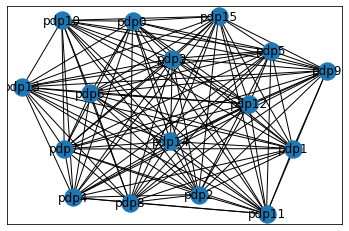

In [13]:
nx.draw_networkx(trip_graph)

A scatter plot just to see the positions of pdp and sensors

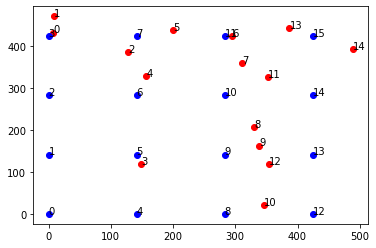

In [239]:
for i in range(len(sensor)):
    plt.scatter(sensor[i][0],sensor[i][1],c='r')
    plt.annotate(i,(sensor[i][0],sensor[i][1]))
for j in range(len(pdp_positions)):
    plt.scatter(pdp_positions[j][0],pdp_positions[j][1],c='b')
    plt.annotate(j,(pdp_positions[j][0],pdp_positions[j][1]))

A directed graph is created from networkx library

In [15]:
K=nx.DiGraph()

sensor nodes are placed in the graph

In [16]:
for i in range(len(sensor)):
    K.add_node('sensor{}'.format(i),pos=sensor[i])

here the euclidean distance between each sensor is calculated and edge is assigned between each sensor 
.Also the edge weight is assigned to 1 if the euclidean distance is less than the transmission range 

In [17]:
def calulate_distance_between_each_sensors_and_assign_weight(points,K):
    distance_sensors={}
    M=K
    k=0
    edge_weight=1
    for i in range(len(points)):
        for j in range(len(points)):
            euclidean_distance=distance(points,i,j)
            if i!=j:
                M.add_edge("sensor{}".format(i),"sensor{}".format(j))
                if euclidean_distance<=transmission_range:
                    
                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=1
                    
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance),(edge_weight)
                else:
                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=100
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance)
            k=k+1
    return distance_sensors,M

In [18]:
euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K)

In [19]:
euclidean_distance_between_sensor

{1: (((7, 432), (8, 471)), 39.01281840626232, 1),
 2: (((7, 432), (128, 386)), 129.4488315899375),
 3: (((7, 432), (149, 119)), 343.70481521212355),
 4: (((7, 432), (157, 329)), 181.95878654244757),
 5: (((7, 432), (200, 439)), 193.12690128513947),
 6: (((7, 432), (295, 424)), 288.1110896859057),
 7: (((7, 432), (311, 359)), 312.64196775225173),
 8: (((7, 432), (330, 207)), 393.64196930713575),
 9: (((7, 432), (338, 163)), 426.5231529471759),
 10: (((7, 432), (346, 22)), 531.9971804436561),
 11: (((7, 432), (353, 327)), 361.58124951385406),
 12: (((7, 432), (354, 119)), 467.3093194020423),
 13: (((7, 432), (387, 442)), 380.13155617496426),
 14: (((7, 432), (489, 392)), 483.65690318654606),
 15: (((8, 471), (7, 432)), 39.01281840626232, 1),
 17: (((8, 471), (128, 386)), 147.05441169852742),
 18: (((8, 471), (149, 119)), 379.18992602652304),
 19: (((8, 471), (157, 329)), 205.8275977608445),
 20: (((8, 471), (200, 439)), 194.64840096954302),
 21: (((8, 471), (295, 424)), 290.8229702069628

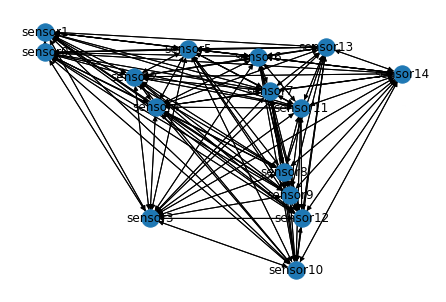

In [20]:
nx.draw(L,nx.get_node_attributes(L,'pos'),with_labels=True)

function to calculate euclidean distance between sensor and pdps

In [21]:
def distance_pdp_sensors(pdp_positions,sensor,u,v):
    x=pdp_positions[u][0]-sensor[v][0]
    y=pdp_positions[u][1]-sensor[v][1]
    return math.sqrt(x*x+y*y)

function to check euclidean distance between sensor node and pdp nodes.After that edge weight is assigned.
Also the edge is added between each pdp node  to all the sensor nodes.So this function can be also known as connectivity graph between sensor node and pdps

In [22]:
def connectivity_graph(pdp_positions,sensor,K):
    J=K
    distance_pdp_each_sensor={}
    k=0
    weight=1
    for i in range(len(pdp_positions)):
        J.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(sensor)):
            euclidean_distance_between_pdp_sensor=distance_pdp_sensors(pdp_positions,sensor,u,v)
            J.add_edge("pdp{}".format(u),"sensor{}".format(v))
            
            if euclidean_distance_between_pdp_sensor<=transmission_range:
                #J.add_edge("pdp{}".format(u),"sensor{}".format(v))
               
                
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=1
                distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor),(weight)
            else:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=100
                distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor)
            k=k+1
    return distance_pdp_each_sensor,J

In [23]:
distance_between_pdp_to_each_sensor,N=connectivity_graph(pdp_positions,sensor,L)

In [24]:
distance_between_pdp_to_each_sensor

{0: (((0.0, 0.0), (7, 432)), 432.0567092408125),
 1: (((0.0, 0.0), (8, 471)), 471.0679356525978),
 2: (((0.0, 0.0), (128, 386)), 406.6693988979254),
 3: (((0.0, 0.0), (149, 119)), 190.68822721919673),
 4: (((0.0, 0.0), (157, 329)), 364.5408070436011),
 5: (((0.0, 0.0), (200, 439)), 482.4116499422459),
 6: (((0.0, 0.0), (295, 424)), 516.5278308087571),
 7: (((0.0, 0.0), (311, 359)), 474.9757888566532),
 8: (((0.0, 0.0), (330, 207)), 389.5497400846264),
 9: (((0.0, 0.0), (338, 163)), 375.2505829442507),
 10: (((0.0, 0.0), (346, 22)), 346.69871646719434),
 11: (((0.0, 0.0), (353, 327)), 481.1839565072801),
 12: (((0.0, 0.0), (354, 119)), 373.46619659615783),
 13: (((0.0, 0.0), (387, 442)), 587.4802124327252),
 14: (((0.0, 0.0), (489, 392)), 626.7256177945816),
 15: (((0.0, 141.4213562373095), (7, 432)), 290.6629460577399),
 16: (((0.0, 141.4213562373095), (8, 471)), 329.67572313480173),
 17: (((0.0, 141.4213562373095), (128, 386)), 276.048388846588),
 18: (((0.0, 141.4213562373095), (149,

In [25]:
colormap=[]
for i,j in N.nodes.data():
    for m,n in j.items():
        if n in sensor:
            colormap.append('b')
        else:
            colormap.append('r')

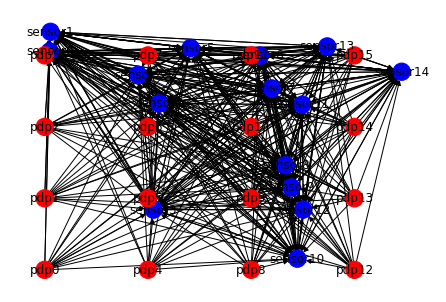

In [26]:
nx.draw(N,nx.get_node_attributes(N, 'pos'),with_labels=True,node_color=colormap)


Here the shortest path between each pdp to each sensor node is calculated.Also the path weight is assigned too.

In [27]:
k=0
arc_length={}
shortest_path={}
y={}
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        if N.has_edge('pdp{}'.format(i),'sensor{}'.format(j)):
            shortest_path[k]=nx.shortest_path(N,source='pdp{}'.format(i),target='sensor{}'.format(j),weight='weight',method='dijkstra')
            arc_length[k]=nx.dijkstra_path_length(N,'pdp{}'.format(i),'sensor{}'.format(j))
            y[i]=arc_length[k] 
           
        else:
            shortest_path[k]=0
        k=k+1

In [28]:
shortest_path[1]

['pdp0', 'sensor1']

In [29]:
arc_length

{0: 100,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 100,
 7: 100,
 8: 100,
 9: 100,
 10: 100,
 11: 100,
 12: 100,
 13: 100,
 14: 100,
 15: 100,
 16: 100,
 17: 100,
 18: 100,
 19: 100,
 20: 100,
 21: 100,
 22: 100,
 23: 100,
 24: 100,
 25: 100,
 26: 100,
 27: 100,
 28: 100,
 29: 100,
 30: 100,
 31: 100,
 32: 100,
 33: 100,
 34: 100,
 35: 100,
 36: 100,
 37: 100,
 38: 100,
 39: 100,
 40: 100,
 41: 100,
 42: 100,
 43: 100,
 44: 100,
 45: 1,
 46: 1,
 47: 100,
 48: 100,
 49: 100,
 50: 100,
 51: 100,
 52: 100,
 53: 100,
 54: 100,
 55: 100,
 56: 100,
 57: 100,
 58: 100,
 59: 100,
 60: 100,
 61: 100,
 62: 100,
 63: 100,
 64: 100,
 65: 100,
 66: 100,
 67: 100,
 68: 100,
 69: 100,
 70: 100,
 71: 100,
 72: 100,
 73: 100,
 74: 100,
 75: 100,
 76: 100,
 77: 100,
 78: 1,
 79: 100,
 80: 100,
 81: 100,
 82: 100,
 83: 100,
 84: 100,
 85: 100,
 86: 100,
 87: 100,
 88: 100,
 89: 100,
 90: 100,
 91: 100,
 92: 2,
 93: 100,
 94: 1,
 95: 3,
 96: 4,
 97: 5,
 98: 100,
 99: 100,
 100: 100,
 101: 6,
 102: 

In [30]:
list1=[value for value in shortest_path.values()]

In [31]:
list1

[['pdp0', 'sensor0'],
 ['pdp0', 'sensor1'],
 ['pdp0', 'sensor2'],
 ['pdp0', 'sensor3'],
 ['pdp0', 'sensor4'],
 ['pdp0', 'sensor5'],
 ['pdp0', 'sensor6'],
 ['pdp0', 'sensor7'],
 ['pdp0', 'sensor8'],
 ['pdp0', 'sensor9'],
 ['pdp0', 'sensor10'],
 ['pdp0', 'sensor11'],
 ['pdp0', 'sensor12'],
 ['pdp0', 'sensor13'],
 ['pdp0', 'sensor14'],
 ['pdp1', 'sensor0'],
 ['pdp1', 'sensor1'],
 ['pdp1', 'sensor2'],
 ['pdp1', 'sensor3'],
 ['pdp1', 'sensor4'],
 ['pdp1', 'sensor5'],
 ['pdp1', 'sensor6'],
 ['pdp1', 'sensor7'],
 ['pdp1', 'sensor8'],
 ['pdp1', 'sensor9'],
 ['pdp1', 'sensor10'],
 ['pdp1', 'sensor11'],
 ['pdp1', 'sensor12'],
 ['pdp1', 'sensor13'],
 ['pdp1', 'sensor14'],
 ['pdp2', 'sensor0'],
 ['pdp2', 'sensor1'],
 ['pdp2', 'sensor2'],
 ['pdp2', 'sensor3'],
 ['pdp2', 'sensor4'],
 ['pdp2', 'sensor5'],
 ['pdp2', 'sensor6'],
 ['pdp2', 'sensor7'],
 ['pdp2', 'sensor8'],
 ['pdp2', 'sensor9'],
 ['pdp2', 'sensor10'],
 ['pdp2', 'sensor11'],
 ['pdp2', 'sensor12'],
 ['pdp2', 'sensor13'],
 ['pdp2', 'sensor1

to assign the path lenght to the shortest path between pdp to sensor so the values are zipped below

In [32]:
zipped=zip(list1,arc_length.values())

In [33]:
type(zipped)

zip

In [34]:
new_list=list(zipped)

In [35]:
new_list

[(['pdp0', 'sensor0'], 100),
 (['pdp0', 'sensor1'], 100),
 (['pdp0', 'sensor2'], 100),
 (['pdp0', 'sensor3'], 100),
 (['pdp0', 'sensor4'], 100),
 (['pdp0', 'sensor5'], 100),
 (['pdp0', 'sensor6'], 100),
 (['pdp0', 'sensor7'], 100),
 (['pdp0', 'sensor8'], 100),
 (['pdp0', 'sensor9'], 100),
 (['pdp0', 'sensor10'], 100),
 (['pdp0', 'sensor11'], 100),
 (['pdp0', 'sensor12'], 100),
 (['pdp0', 'sensor13'], 100),
 (['pdp0', 'sensor14'], 100),
 (['pdp1', 'sensor0'], 100),
 (['pdp1', 'sensor1'], 100),
 (['pdp1', 'sensor2'], 100),
 (['pdp1', 'sensor3'], 100),
 (['pdp1', 'sensor4'], 100),
 (['pdp1', 'sensor5'], 100),
 (['pdp1', 'sensor6'], 100),
 (['pdp1', 'sensor7'], 100),
 (['pdp1', 'sensor8'], 100),
 (['pdp1', 'sensor9'], 100),
 (['pdp1', 'sensor10'], 100),
 (['pdp1', 'sensor11'], 100),
 (['pdp1', 'sensor12'], 100),
 (['pdp1', 'sensor13'], 100),
 (['pdp1', 'sensor14'], 100),
 (['pdp2', 'sensor0'], 100),
 (['pdp2', 'sensor1'], 100),
 (['pdp2', 'sensor2'], 100),
 (['pdp2', 'sensor3'], 100),
 (['

Here to calculate the weight for each pdp we need to group the path length of the shortest distance between the pdp 
and sensor which is also known as hop.
Since dijkstra algorithm is giving the shortest length with path length having weights =100 so we are replacing them with 0

In [36]:
from collections import defaultdict

values=defaultdict(list)
for j in range(len(pdp_positions)):
    for k,v in new_list:
        if k[0]=='pdp{}'.format(j):
            if v!=100:
                values[j].append(v)
            else:
                values[j].append(0)
                
            


In [37]:
values=dict(values)

In [38]:
values

{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 3: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 5: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 6: [0, 0, 2, 0, 1, 3, 4, 5, 0, 0, 0, 6, 0, 5, 0],
 7: [0, 0, 1, 0, 1, 1, 2, 3, 0, 0, 0, 4, 0, 3, 0],
 8: [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 2, 0, 0],
 9: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0],
 10: [0, 0, 4, 0, 5, 3, 2, 1, 1, 2, 3, 1, 2, 3, 0],
 11: [0, 0, 2, 0, 3, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0],
 12: [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 2, 0, 0],
 13: [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0],
 14: [0, 0, 5, 0, 6, 4, 3, 2, 0, 0, 0, 1, 0, 4, 0],
 15: [0, 0, 4, 0, 5, 3, 2, 3, 0, 0, 0, 4, 0, 1, 1]}

here we are counting the unique values in the list 

In [39]:
values1={}
counts={}
for keys,val in values.items():
    values1[keys],counts[keys]=np.unique(val, return_counts=True)

In [40]:
values1

{0: array([0]),
 1: array([0]),
 2: array([0]),
 3: array([0, 1]),
 4: array([0]),
 5: array([0, 1]),
 6: array([0, 1, 2, 3, 4, 5, 6]),
 7: array([0, 1, 2, 3, 4]),
 8: array([0, 1, 2, 3]),
 9: array([0, 1, 2]),
 10: array([0, 1, 2, 3, 4, 5]),
 11: array([0, 1, 2, 3]),
 12: array([0, 1, 2, 3]),
 13: array([0, 1, 2]),
 14: array([0, 1, 2, 3, 4, 5, 6]),
 15: array([0, 1, 2, 3, 4, 5])}

In [41]:
counts

{0: array([15], dtype=int64),
 1: array([15], dtype=int64),
 2: array([15], dtype=int64),
 3: array([13,  2], dtype=int64),
 4: array([15], dtype=int64),
 5: array([14,  1], dtype=int64),
 6: array([8, 1, 1, 1, 1, 2, 1], dtype=int64),
 7: array([8, 3, 1, 2, 1], dtype=int64),
 8: array([11,  1,  1,  2], dtype=int64),
 9: array([11,  3,  1], dtype=int64),
 10: array([4, 3, 3, 3, 1, 1], dtype=int64),
 11: array([8, 3, 3, 1], dtype=int64),
 12: array([11,  1,  1,  2], dtype=int64),
 13: array([11,  2,  2], dtype=int64),
 14: array([8, 1, 1, 1, 2, 1, 1], dtype=int64),
 15: array([7, 2, 1, 2, 2, 1], dtype=int64)}

In [42]:
def calculate_weight(values,hops):
    weight_of_pdp={}
    for i in range(len(values)):
        weight=0
        for j in range(len(values[i])):
            if values[i][j]!=0:
                print(values[i][j])
                print(hops[i][j])
                print('***')
                weight=weight+hops[i][j]/values[i][j]
        weight_of_pdp[i]=weight
    return weight_of_pdp

In [43]:
weight=calculate_weight(values1,counts)

1
2
***
1
1
***
1
1
***
2
1
***
3
1
***
4
1
***
5
2
***
6
1
***
1
3
***
2
1
***
3
2
***
4
1
***
1
1
***
2
1
***
3
2
***
1
3
***
2
1
***
1
3
***
2
3
***
3
3
***
4
1
***
5
1
***
1
3
***
2
3
***
3
1
***
1
1
***
2
1
***
3
2
***
1
2
***
2
2
***
1
1
***
2
1
***
3
1
***
4
2
***
5
1
***
6
1
***
1
2
***
2
1
***
3
2
***
4
2
***
5
1
***


In [44]:
weight

{0: 0,
 1: 0,
 2: 0,
 3: 2.0,
 4: 0,
 5: 1.0,
 6: 2.6499999999999995,
 7: 4.416666666666667,
 8: 2.1666666666666665,
 9: 3.5,
 10: 5.95,
 11: 4.833333333333333,
 12: 2.1666666666666665,
 13: 3.0,
 14: 2.6999999999999997,
 15: 3.8666666666666667}

In [50]:
marklist = sorted(weight.items(), key=lambda x:x[1])
sorted_weight=dict(marklist)



In [51]:
sorted_weight

{0: 0,
 1: 0,
 2: 0,
 4: 0,
 5: 1.0,
 3: 2.0,
 8: 2.1666666666666665,
 12: 2.1666666666666665,
 6: 2.6499999999999995,
 14: 2.6999999999999997,
 13: 3.0,
 9: 3.5,
 15: 3.8666666666666667,
 7: 4.416666666666667,
 11: 4.833333333333333,
 10: 5.95}

In [45]:
import operator

maxi=max(weight.items(), key=operator.itemgetter(1))[0]

In [46]:
maxi

10

In [246]:
def spanning_tree_collecting_time():
    sensor_subset=[]
    weight1=0
    for i in range(len(new_list)):
        if new_list[i][0][0]=='pdp15':
            if new_list[i][1]!=100:
                print(i)
                sensor_subset.append(new_list[i][0][-1])
            
                print(new_list[i][0][-1])
                print(new_list[i][1])
                print('**')
                for i in range(1,new_list[i][1]+1):
                    weight1=weight1+j
    return weight1 ,sensor_subset


In [247]:
calculated_weight,sensor_subset=spanning_tree_collecting_time()

227
sensor2
4
**
229
sensor4
5
**
230
sensor5
3
**
231
sensor6
2
**
232
sensor7
3
**
236
sensor11
4
**
238
sensor13
1
**
239
sensor14
1
**


In [248]:
sensor_subset

['sensor2',
 'sensor4',
 'sensor5',
 'sensor6',
 'sensor7',
 'sensor11',
 'sensor13',
 'sensor14']

In [83]:
distance_between_pdp

{0: ((0, 0), 0.0),
 1: ((0, 1), 141.4213562373095),
 2: ((0, 2), 282.842712474619),
 3: ((0, 3), 424.26406871192853),
 4: ((0, 4), 141.4213562373095),
 5: ((0, 5), 200.0),
 6: ((0, 6), 316.22776601683796),
 7: ((0, 7), 447.21359549995793),
 8: ((0, 8), 282.842712474619),
 9: ((0, 9), 316.22776601683796),
 10: ((0, 10), 400.0),
 11: ((0, 11), 509.9019513592785),
 12: ((0, 12), 424.26406871192853),
 13: ((0, 13), 447.21359549995793),
 14: ((0, 14), 509.9019513592785),
 15: ((0, 15), 600.0),
 16: ((1, 0), 141.4213562373095),
 17: ((1, 1), 0.0),
 18: ((1, 2), 141.4213562373095),
 19: ((1, 3), 282.842712474619),
 20: ((1, 4), 200.0),
 21: ((1, 5), 141.4213562373095),
 22: ((1, 6), 200.0),
 23: ((1, 7), 316.22776601683796),
 24: ((1, 8), 316.22776601683796),
 25: ((1, 9), 282.842712474619),
 26: ((1, 10), 316.22776601683796),
 27: ((1, 11), 400.0),
 28: ((1, 12), 447.21359549995793),
 29: ((1, 13), 424.26406871192853),
 30: ((1, 14), 447.21359549995793),
 31: ((1, 15), 509.9019513592785),
 3

In [234]:
def threshold_distance_inside_sensor_range():
    trs=(data_stored/bandwidth)*drone_speed
    return trs

In [235]:
thrs=threshold_distance_inside_sensor_range()
print (thrs)

5.0


In [257]:
def calculate_Euclidean_distance_between_two_end_pdp_and_sensor(pdp_init,pdp_final,sensor_p):
    euclidean_distance=np.linalg.norm(np.cross(np.asarray(pdp_positions[pdp_final])-np.asarray(pdp_positions[pdp_init]),np.asarray(pdp_positions[pdp_init])-np.asarray(sensor[sensor_p])))/np.linalg.norm(np.asarray(pdp_positions[pdp_final])-np.asarray(pdp_positions[pdp_init]))
    print(euclidean_distance)
    dsi=2*math.sqrt(abs(transmission_range*transmission_range-euclidean_distance*euclidean_distance))
    print(dsi)
    if dsi>=threshold_distance_inside_sensor_range():
        return 1
    else:
        return 0
    

In [258]:
distance=calculate_Euclidean_distance_between_two_end_pdp_and_sensor(0,10,1)

327.3904396893715
623.4885724694559


In [256]:
distance

1

In [ ]:
def calculate_trip_time(Route,dspeed):
    total_route=[0]+Route+[0]
    trip_time=0
    for j in range(len(total_route)):
        if j<len(total_route)-1:
            for key,value in distance_between_pdp.items():
                if total_route[j]==value[0][0] and total_route[j+1]==value[0][1]:
                    trip_time=trip_time+(value[1]/drone_speed)
    return trip_time

In [240]:
total_route=[0,10,11,0]

In [241]:
trip_time=0
for j in range(len(total_route)):
    if j<len(total_route)-1:
        for key,value in distance_between_pdp.items():
            if total_route[j]==value[0][0] and total_route[j+1]==value[0][1]:
                
                trip_time=trip_time+(value[1]/drone_speed)
                print(trip_time)

200.0
270.71067811865476
525.661653798294


In [242]:
trip_time

525.661653798294

In [ ]:
def incremental_heuristic(sensor,pdp_positions,data_stored,bandwidht,dspeed):
    best_time=math.inf
    pdp_sets=[]
    Sensor_subsets={}
    route=[]
    Set_of_sensors_while_moving=[]
    weight1=weight
    while i_ter<=range(pdp_positions):
        maxi=max(weight1.items(),key=operator.itemgetter(1))[0]
        route.append(maxi)
        weight1[maxi]=-1
        i=i+1
        calculatedspanning_tree_collecting_time(maxi)
        
        

In [211]:
a=np.arange(len(pdp_positions)).reshape(int(math.sqrt(len(pdp_positions))),int(math.sqrt(len(pdp_positions))))

In [212]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [210]:
def get_neighbours(a,search_value):
    neighbours=[]
    for i in range(len(a)):
        for j,value in enumerate(a[i]):
            if i == 0 or i == len(a) - 1 or j == 0 or j == len(a[i]) - 1:
                new_neighbors=[]
                if i!=0:
                    new_neighbors.append(a[i - 1][j]) 
                if j!=len(a[i])-1:
                    new_neighbors.append(a[i][j+1])
                if i!=len(a)-1:
                    new_neighbors.append(a[i+1][j])
                if j!=0:
                    new_neighbors.append(a[i][j-1])
            else:
                new_neighbors=[
                    a[i-1][j],
                    a[i][j+1],
                    a[i+1][j],
                    a[i][j-1]
                ]
            neighbours.append({value:new_neighbors})
    for s in neighbours:
        for key,value in s.items():
            if key==search_value:
                n=value
    return n
                
        

In [249]:
c=get_neighbours(a,10)

In [250]:
c

[6, 11, 14, 9]

In [271]:
subset={}
for i in range(0,10):
    for j in range(len(c)):
        subset[i]=(i,c[j])

In [272]:
subset

{0: (0, 9),
 1: (1, 9),
 2: (2, 9),
 3: (3, 9),
 4: (4, 9),
 5: (5, 9),
 6: (6, 9),
 7: (7, 9),
 8: (8, 9),
 9: (9, 9)}

In [273]:
new_list

[(['pdp0', 'sensor0'], 100),
 (['pdp0', 'sensor1'], 100),
 (['pdp0', 'sensor2'], 100),
 (['pdp0', 'sensor3'], 100),
 (['pdp0', 'sensor4'], 100),
 (['pdp0', 'sensor5'], 100),
 (['pdp0', 'sensor6'], 100),
 (['pdp0', 'sensor7'], 100),
 (['pdp0', 'sensor8'], 100),
 (['pdp0', 'sensor9'], 100),
 (['pdp0', 'sensor10'], 100),
 (['pdp0', 'sensor11'], 100),
 (['pdp0', 'sensor12'], 100),
 (['pdp0', 'sensor13'], 100),
 (['pdp0', 'sensor14'], 100),
 (['pdp1', 'sensor0'], 100),
 (['pdp1', 'sensor1'], 100),
 (['pdp1', 'sensor2'], 100),
 (['pdp1', 'sensor3'], 100),
 (['pdp1', 'sensor4'], 100),
 (['pdp1', 'sensor5'], 100),
 (['pdp1', 'sensor6'], 100),
 (['pdp1', 'sensor7'], 100),
 (['pdp1', 'sensor8'], 100),
 (['pdp1', 'sensor9'], 100),
 (['pdp1', 'sensor10'], 100),
 (['pdp1', 'sensor11'], 100),
 (['pdp1', 'sensor12'], 100),
 (['pdp1', 'sensor13'], 100),
 (['pdp1', 'sensor14'], 100),
 (['pdp2', 'sensor0'], 100),
 (['pdp2', 'sensor1'], 100),
 (['pdp2', 'sensor2'], 100),
 (['pdp2', 'sensor3'], 100),
 (['

In [ ]:
def assing_subset_sensor():
    sensor_subset={}
    route=[]
    weight2=weight
    while i_ter<=range(len(pdp_positions)):
        maxi=max(weight1.items(),key=operator.itemgetter(1))[0]
        weight[maxi]=-1
        route.append(maxi)
        spanning_tree_collecting_time(i_ter,maxi)

        